# Stock Market Prediction and Forecasting Using Stack LSTM

In [1]:
import pandas_datareader as pdr

In [3]:
key= 'b28a6541955993ea10a48c2c044fb1c3c1623166'
df= pdr.get_data_tiingo('AAPL', api_key = key)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-07-17 00:00:00+00:00  149.56  150.90  148.57  148.82  23243713   
       2017-07-18 00:00:00+00:00  150.08  150.13  148.67  149.20  17713795   
       2017-07-19 00:00:00+00:00  151.02  151.42  149.95  150.48  20615419   
       2017-07-20 00:00:00+00:00  150.34  151.74  150.19  151.50  17053326   
       2017-07-21 00:00:00+00:00  150.27  150.44  148.88  149.99  24671002   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-07-17 00:00:00+00:00  35.389423  35.706498  35.155165  35.214321   
       2017-07-18 00:00:00+00:00  35.512467  35.524298  35.178828  35.304238   
       2017-07-19 00:00:00+00:00  35.734893  35.829543  35.481706  35.607116   
       2017-07-20 00:00:00+00:00  35.573989  35.905262  35.538496  35.848473   
       2017-07-21 00:00:00+00:00  35.557426  35.597652  35.228519  35.491171   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-07-17 00:00:00+00:00   92974852      0.0          1.0  
       2017-07-18 00:00:00+00:00   70855180      0.0          1.0  
       2017-07-19 00:00:00+00:00   82461676      0.0          1.0  
       2017-07-20 00:00:00+00:00   68213304      0.0          1.0  
       2017-07-21 00:00:00+00:00   98684008      0.0          1.0

In [6]:
df2 = df.reset_index()['close']

In [7]:
df2.shape

(1258,)

In [8]:
df2

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1253    147.04
1254    144.87
1255    145.86
1256    145.49
1257    148.47
Name: close, Length: 1258, dtype: float64

## Ploting the data

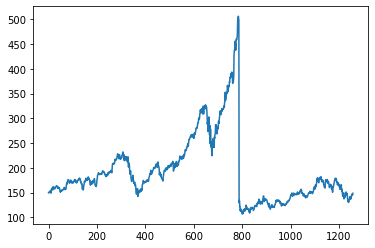

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2)

LSTM is sensitive to the scale of data so we apply MinMax scaler to transform the value b/w 0 to 1

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [11]:
print(df2)

[[0.10700063]
 [0.10830307]
 [0.11065748]
 ...
 [0.09773325]
 [0.09680651]
 [0.10427051]]


In case of regression or classification problem, train and test split can be done with Cross Validation or Random Seed etc.
But in case of time series data, we need to consider a concurrent set of data for training and testing. We use some timesteps for features (taken as independed values) to calculate next timestep value(depending of previous timesteps features ans we check). we have many such considutive set of data in multiple datastep sets.

In [12]:
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data, test_data = df2[0:training_size, :], df2[training_size: len(df2),:1]

In [13]:
training_size, test_size

(817, 441)

In [17]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [21]:
print(X_test.shape, y_test.shape)

(340, 100) (340,)


In [22]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
# create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Init Plugin
Init Graph Optimizer
Init Kernel


In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')


Metal device set to: Apple M1


2022-07-15 12:12:14.435730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 12:12:14.436408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100, batch_size=64, verbose=1)



2022-07-15 14:31:40.236679: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-15 14:31:40.242953: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-07-15 14:31:41.994274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:42.144961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:42.867043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:43.143679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:43.947306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:45.166344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:45.600404: I tensorflow/core/grappler/optimizers/cust

12/12 [==============================] - ETA: 0s - loss: 0.0463

2022-07-15 14:31:49.702744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:49.747005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:49.961278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:31:50.178103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 11s 439ms/step - loss: 0.0463 - val_loss: 0.0061
Epoch 2/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0160 - val_loss: 0.0099
Epoch 3/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0138 - val_loss: 0.0019
Epoch 4/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0100 - val_loss: 0.0034
Epoch 5/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0096 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0092 - val_loss: 2.6202e-04
Epoch 7/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0086 - val_loss: 2.6419e-04
Epoch 8/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0085 - val_loss: 0.0014
Epoch 9/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0072 - val_loss: 0.0022
Epoch 10/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0067 - val_loss:

12/12 [==============================] - 1s 116ms/step - loss: 0.0024 - val_loss: 1.6390e-04
Epoch 80/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0023 - val_loss: 1.2890e-04
Epoch 81/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0022 - val_loss: 2.2276e-04
Epoch 82/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0022 - val_loss: 1.4396e-04
Epoch 83/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0021 - val_loss: 1.8569e-04
Epoch 84/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0020 - val_loss: 1.5703e-04
Epoch 85/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0021 - val_loss: 1.4865e-04
Epoch 86/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0019 - val_loss: 1.4769e-04
Epoch 87/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0018 - val_loss: 1.4888e-04
Epoch 88/100
12/12 [==============================] - 1s 11

predictions

In [29]:
train_prediction = model.predict(X_train)
test_predict=model.predict(X_test)

2022-07-15 14:35:18.538077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:35:18.583318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:35:18.835495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-15 14:35:19.068248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


transformback to original form

In [31]:
train_predict = scaler.inverse_transform(train_prediction)
test_predict = scaler.inverse_transform(test_predict)

metric calculations

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

234.18562421171083

In [34]:
math.sqrt(mean_squared_error(y_test, test_predict))

156.27275098669125

Plotting

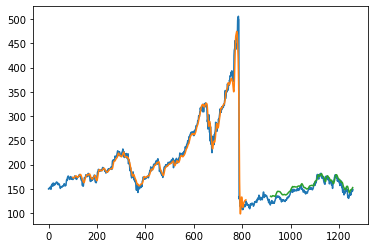

In [35]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=numpy.empty_like(df2)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## Now, Prediction of future 30 days

In [37]:
len(test_data)

441

for predicting a days data, I need previous 100 days data

In [38]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
#prediction for next 10 days

from numpy import array

fstst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input= x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat)) 
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
                                 
        fstst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        fstst_output.extend(yhat.tolist())
        i=i+1

print(fstst_output)                                      

0 day input [0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.11689851 0.11924755 0.12250025 0.12630284 0.13032246
 0.13433719 0.13822725 0.14193976 0.14545813 0.1487821  0.15191787
 0.15487322 0.15765654 0.16027626 0.16274086 0.16505888 0.16723868
 0.16928843 0.1712158  0.17302799 0.17473167 0.17633286 0.17783719
 0.17924958 0.18057469 0.18181679 0.18297976 0.18406752 0.18508348
 0.18603125 0.18691415 0.18773547 0.18849847 0.18920642 0.18986237
 0.1904695  0.1910308  0.19154927 0.19202769 0.19246885 0.19287533
 0.19324964 0.19359428 0.19391128 0.1942029  0.19447103 0.19471744
 0.1949439  0.19515193 0.19534296 0.19551837 0.19567

7 day output [[0.19708854]]
8 day input [0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.11689851
 0.11924755 0.12250025 0.12630284 0.13032246 0.13433719 0.13822725
 0.14193976 0.14545813 0.1487821  0.15191787 0.15487322 0.15765654
 0.16027626 0.16274086 0.16505888 0.16723868 0.16928843 0.1712158
 0.17302799 0.17473167 0.17633286 0.17783719 0.17924958 0.18057469
 0.18181679 0.18297976 0.18406752 0.18508348 0.18603125 0.18691415
 0.18773547 0.18849847 0.18920642 0.18986237 0.1904695  0.1910308
 0.19154927 0.19202769 0.19246885 0.19287533 0.19324964 0.19359428
 0.19391128 0.1942029  0.19447103 0.19471744 0.1949439  0.19515193
 0.19534296 0.19551837 0.1956794  0.19582704 0.19596243 0.19608662
 0.19620028 0.19630438 0

17 day output [[0.19725662]]
18 day input [0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.11689851 0.11924755 0.12250025 0.12630284 0.13032246
 0.13433719 0.13822725 0.14193976 0.14545813 0.1487821  0.15191787
 0.15487322 0.15765654 0.16027626 0.16274086 0.16505888 0.16723868
 0.16928843 0.1712158  0.17302799 0.17473167 0.17633286 0.17783719
 0.17924958 0.18057469 0.18181679 0.18297976 0.18406752 0.18508348
 0.18603125 0.18691415 0.18773547 0.18849847 0.18920642 0.18986237
 0.1904695  0.1910308  0.19154927 0.19202769 0.19246885 0.19287533
 0.19324964 0.19359428 0.19391128 0.1942029  0.19447103 0.19471744
 0.1949439  0.19515193 0.19534296 0.19551837 0.1956794  0.19582704
 0.19596243 0.19608662 0.19620028 0.19630438 0.19639957 0.19648662
 0.19656622 0.19663888 0.1967051  0.19676554 0.19682056 0.19687068
 0.19691628 0.196957

25 day output [[0.19730732]]
26 day input [0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.11689851
 0.11924755 0.12250025 0.12630284 0.13032246 0.13433719 0.13822725
 0.14193976 0.14545813 0.1487821  0.15191787 0.15487322 0.15765654
 0.16027626 0.16274086 0.16505888 0.16723868 0.16928843 0.1712158
 0.17302799 0.17473167 0.17633286 0.17783719 0.17924958 0.18057469
 0.18181679 0.18297976 0.18406752 0.18508348 0.18603125 0.18691415
 0.18773547 0.18849847 0.18920642 0.18986237 0.1904695  0.1910308
 0.19154927 0.19202769 0.19246885 0.19287533 0.19324964 0.19359428
 0.19391128 0.1942029  0.19447103 0.19471744 0.1949439  0.19515193
 0.19534296 0.19551837 0.1956794  0.19582704 0.19596243 0.19608662
 0.19620028 0.19630438 0.19639957 0.19648662 0.19656622 0.19663888
 0.1967051  0.19676554 0.19682056 0.19687068 0.19691628 0.19695768
 0.19699532 0.19702947 0.19706044 0.19708854 0.19711399 0.19713703
 0.19715786 0.19717669

In [65]:
day_new= np.arange(1,101)
day_pred = np.arange(101, 131)

In [66]:
import matplotlib.pyplot as plt

In [59]:
len(df2)

1258

In [67]:
df3 =df2.tolist()
df3.extend(fstst_output)

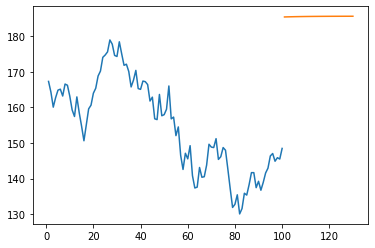

In [68]:
plt.plot(day_new, scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred, scaler.inverse_transform(fstst_output))

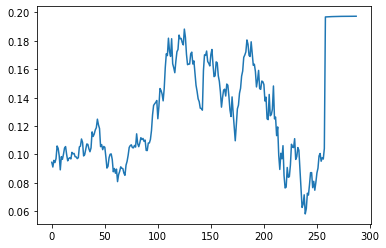

In [69]:
df3=df2.tolist()
df3.extend(fstst_output)
plt.plot(df3[1000:])

ways to improve using bidirectional LSTM